# Project Title:- **Higher Education Wages**


Description:-Perform Exploratory Data Analysis on the given dataset to get the insights and hidden trends from the data. Results like most expensive university, posts offered as per higher education etc. was achieved.

canditeted Name:-1.Tanushri Umaji Dhote 2.Simran Chaddha

Dataset:-https://www.kaggle.com/datasets/thedevastator/uncovering-wage-disparities-in-pennsylvania-s-hi/discussion


In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import plotly.express as px

In [2]:
df=pd.read_csv('/content/Higher education wages.zip')

**Data Preprocessing**

In [3]:
df.head()

,index,Name,Base Pay,University or Office,Position
0,0,"Driscoll, Michael Allan",$275000,Indiana,University President
1,1,"Weisenstein, Greg R",$241935,West Chester,University President
2,2,"Welsh, Marcia L",$230000,East Stroudsburg,University President
3,3,"Norton, Cheryl J.",$225000,Slippery Rock,University President
4,4,"Wollman, Julie E.",$225000,Edinboro,University President


In [4]:
df.tail()

,index,Name,Base Pay,University or Office,Position
12627,12627,"Black, Jacqueline D",$1254,Edinboro,"Instructor, PT Temp"
12628,12628,"Webster, Kim",$1245,Kutztown,Instructor
12629,12629,"Hanelly, William T",$152950,Lock Haven,Vice President/Fin.Admin
12630,12630,"Moran, James D Iii",$193125,Office of the Chancellor,Vice Chancellor Academic & Student Affairs
12631,12631,"Cavanaugh, John C",$327500,Office of the Chancellor,Chancellor


In [5]:
df

,index,Name,Base Pay,University or Office,Position
0,0,"Driscoll, Michael Allan",$275000,Indiana,University President
1,1,"Weisenstein, Greg R",$241935,West Chester,University President
2,2,"Welsh, Marcia L",$230000,East Stroudsburg,University President
3,3,"Norton, Cheryl J.",$225000,Slippery Rock,University President
4,4,"Wollman, Julie E.",$225000,Edinboro,University President
...,...,...,...,...,...
12627,12627,"Black, Jacqueline D",$1254,Edinboro,"Instructor, PT Temp"
12628,12628,"Webster, Kim",$1245,Kutztown,Instructor
12629,12629,"Hanelly, William T",$152950,Lock Haven,Vice President/Fin.Admin
12630,12630,"Moran, James D Iii",$193125,Office of the Chancellor,Vice Chancellor Academic & Student Affairs


In [6]:
df.shape

(12632, 5)

In [7]:
df.columns

Index(['index', 'Name', 'Base Pay', 'University or Office', 'Position'], dtype='object')

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12632 entries, 0 to 12631
Data columns (total 5 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   index                 12632 non-null  int64 
 1   Name                  12632 non-null  object
 2   Base Pay              12632 non-null  object
 3   University or Office  12632 non-null  object
 4   Position              12632 non-null  object
dtypes: int64(1), object(4)
memory usage: 493.6+ KB


In [9]:
df.describe()

,index
count,12632.000000
mean,6315.500000
std,3646.688635
min,0.000000
25%,3157.750000
50%,6315.500000
75%,9473.250000
max,12631.000000


In [10]:
df.isnull().sum()

index                   0
Name                    0
Base Pay                0
University or Office    0
Position                0
dtype: int64

In [11]:
df.nunique()

index                   12632
Name                    12583
Base Pay                 2126
University or Office       15
Position                 3315
dtype: int64

In [12]:
df.drop(columns=['index'],inplace=True)

In [14]:
df['Base Pay'].value_counts()

$107870    764
$88745     458
$44795     365
$11199     341
$27012     234
          ... 
$71070       1
$71087       1
$71105       1
$71201       1
$327500      1
Name: Base Pay, Length: 2126, dtype: int64

**we need to delete $**


In [15]:
df['Base Pay'] = df['Base Pay'].str.replace('$', '',regex=False)

**replace the  $ and set the ''**

In [16]:
df['Base Pay'].dtypes

dtype('O')

In [18]:
df['Base Pay'] = df['Base Pay'].astype('float') 

**change the datatype to float**


In [19]:
df['Base Pay'].dtypes

dtype('float64')

In [20]:
df

,Name,Base Pay,University or Office,Position
0,"Driscoll, Michael Allan",275000.0,Indiana,University President
1,"Weisenstein, Greg R",241935.0,West Chester,University President
2,"Welsh, Marcia L",230000.0,East Stroudsburg,University President
3,"Norton, Cheryl J.",225000.0,Slippery Rock,University President
4,"Wollman, Julie E.",225000.0,Edinboro,University President
...,...,...,...,...
12627,"Black, Jacqueline D",1254.0,Edinboro,"Instructor, PT Temp"
12628,"Webster, Kim",1245.0,Kutztown,Instructor
12629,"Hanelly, William T",152950.0,Lock Haven,Vice President/Fin.Admin
12630,"Moran, James D Iii",193125.0,Office of the Chancellor,Vice Chancellor Academic & Student Affairs


In [21]:
df.describe()

,Base Pay
count,12632.000000
mean,57575.800823
std,29768.238649
min,1245.000000
25%,34328.000000
50%,51856.000000
75%,76661.000000
max,327500.000000


In [22]:
df[[ 'Name','Base Pay','Position']].sort_values(by=['Base Pay'] , ascending=False) [:30]

,Name,Base Pay,Position
12631,"Cavanaugh, John C",327500.0,Chancellor
0,"Driscoll, Michael Allan",275000.0,University President
1,"Weisenstein, Greg R",241935.0,University President
2,"Welsh, Marcia L",230000.0,University President
3,"Norton, Cheryl J.",225000.0,University President
4,"Wollman, Julie E.",225000.0,University President
5,"Mcnairy, Francine G",222100.0,University President
6,"Fiorentino, Michael Jr",220000.0,University President
7,"Whitney, Karen M.",220000.0,University President
8,"Cevallos, Francisco Javier",218956.0,University President


**sort the data by Base pay**

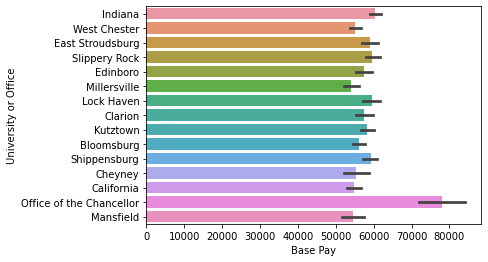

In [24]:
sns.barplot(data=df, y='University or Office', x='Base Pay')

**from this conclusion of barplot in office of the chancellor has the highest count**

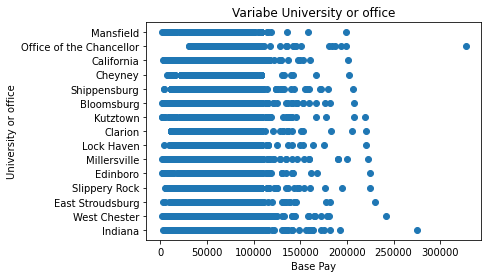

In [26]:
plt.scatter(x='Base Pay',y='University or Office',data=df)
plt.xlabel('Base Pay')
plt.ylabel('University or office')
plt.title('Variabe University or office')
plt.show()

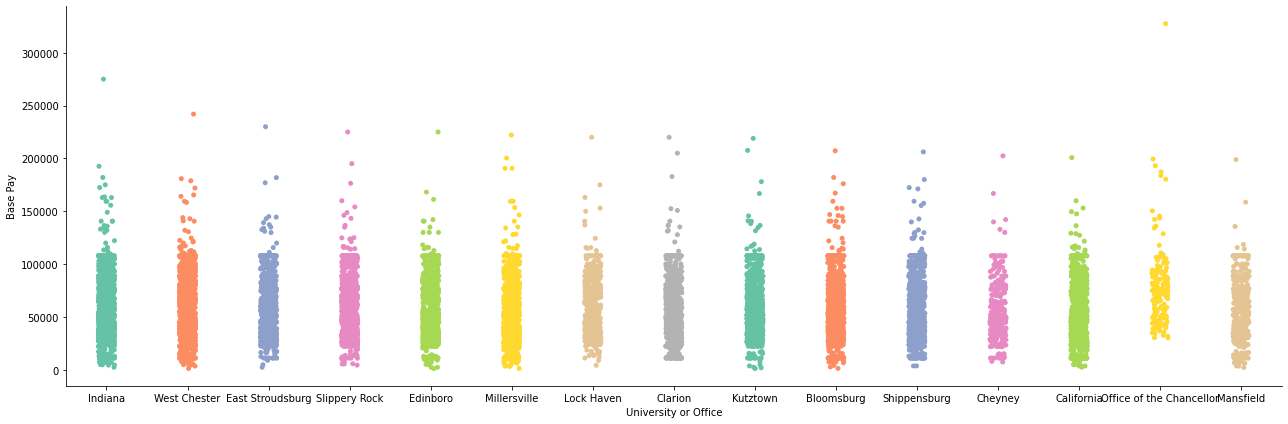

In [27]:
sns.catplot(x = "University or Office", y = "Base Pay", palette = "Set2", data = df,height=6,aspect=3)

**In this graph the University or office as high base pay**

In [28]:
import plotly.graph_objects as go
import plotly.express as exp

In [35]:
from re import X
fig = exp.bar(df, y='Name', x='Base Pay')
fig.update_layout(title='Name on base pay',paper_bgcolor='rgb(233,233,233)', yaxis_title='Name', xaxis_title='Base Pay', height=400, width=1000,showlegend=True)
fig.show()

**In this graph Drisooll , Michael Allan has high base pay**

In [32]:
legend_groups=['Position', 'University or Office']

In [33]:
fig = go.Figure(layout=go.Layout(height=600, width=800, title=go.layout.Title(text="Position University & Pay")))
fig.add_trace(go.Scatter(x=df['Base Pay'], y=df['Position'], hovertext=['Base Pay', 'Position'], name=legend_groups[0]))
fig.add_trace(go.Scatter(x=df['Base Pay'], y=df['University or Office'], hovertext=['Base Pay', 'University or Office'], name=legend_groups[1]))
fig.update_layout(xaxis_title='Base Pay', yaxis_title='Position name')
fig.show()

**In this graph instructor position has higher base pay**

In [37]:
from sklearn.cluster import KMeans

In [38]:
x=df.iloc[:,3:5].values

In [39]:
x

array([['University President'],
       ['University President'],
       ['University President'],
       ...,
       ['Vice President/Fin.Admin'],
       ['Vice Chancellor Academic & Student Affairs'],
       ['Chancellor']], dtype=object)